## Modeling Notebook: AI-Powered Financial Behavior Coach

**Objective**

Goal:
- Build models to predict transaction amounts and identify spending patterns that can be used for financial coaching.
- Use structured features (age, category, merchant, gender, etc.) for ML models
- Use text features (description, description_source) for LLM-based personalized insights
- Explore 2–3 ML models and identify the best one
- Prepare the final dataset and model for interactive Streamlit chatbot deployment

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load train/test splits from preprocessing
X_train = joblib.load("X_train_scaled.pkl")
X_test = joblib.load("X_test_scaled.pkl")
y_train = joblib.load("y_train.pkl")
y_test = joblib.load("y_test.pkl")

# Optional: feature names for feature importance plotting
ml_feature_names = list(X_train.columns) if isinstance(X_train, pd.DataFrame) else None

# Placeholder for text features for future LLM integration
# Currently skipping actual LLM features to avoid FileNotFoundError
# text_features = pd.read_csv("text_features.csv")


In [3]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression RMSE: {rmse_lr:.2f}")
print(f"Linear Regression R^2: {r2_lr:.2f}")


Linear Regression RMSE: 605.20
Linear Regression R^2: 0.06


Linear regression: Baseline model to compare performance with more complex algorithms.

In [4]:
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=15,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest RMSE: {rmse_rf:.2f}")
print(f"Random Forest R^2: {r2_rf:.2f}")


Random Forest RMSE: 373.74
Random Forest R^2: 0.64


Random forest captures non-linear relationships and patterns better than Linear Regression.

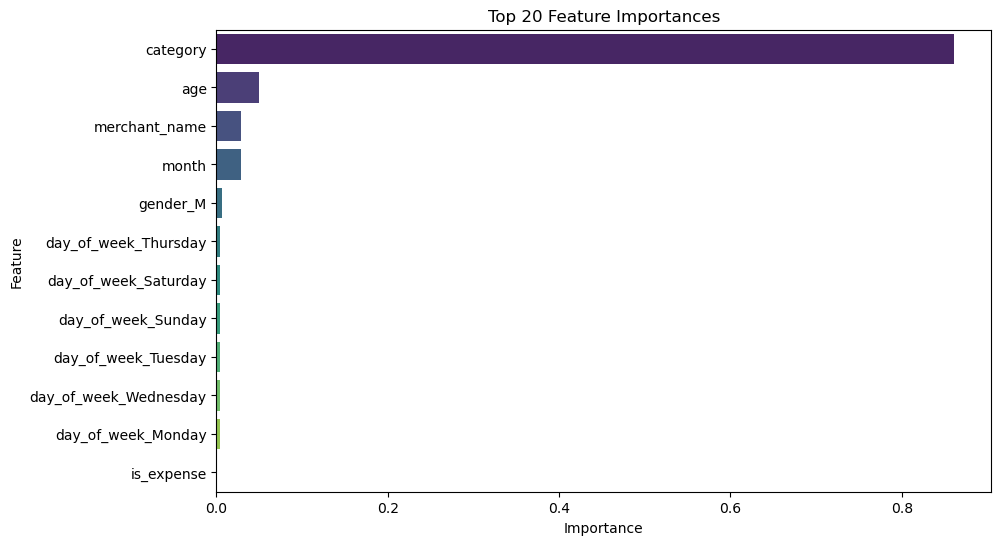

In [7]:
plt.figure(figsize=(10,6))
sns.barplot(
    x="importance",
    y="feature",
    data=feat_imp.head(20),
    hue="feature",        # Add hue to match each feature
    dodge=False,          # Avoid splitting bars by hue
    palette="viridis",
    legend=False           # Turn off duplicate legend
)
plt.title("Top 20 Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


In [8]:
# Placeholder for LLM-based financial advice
# Example:
# text_features['advice'] = text_features['description'].apply(
#     lambda x: llm.generate(f"Provide financial advice for transaction: {x}")
# )


In [10]:
joblib.dump(rf_model, "best_rf_model.pkl")
joblib.dump(lr_model, "linear_regression_model.pkl")


['linear_regression_model.pkl']

**Next Steps**

- Deploy models in Streamlit for an interactive financial coach.
- Integrate LLM to generate personalized spending advice from transaction descriptions.
- Use feature importance to explain key spending drivers to users.